# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Fajar Rahmat
- **Email:** fajarrahmat052@gmail.com
- **ID Dicoding:** MC282D5Y1510

## Menentukan Pertanyaan Bisnis

- **Bagaimana hubungan antara faktor cuaca dengan tingkat polusi udara di masing-masing wilayah?**
- **Bagaimana perbedaan tingkat polusi udara antara Aotizhongxin dan Changping?**


## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PRSA_Data_Dongsi_20130301-20170228.csv to PRSA_Data_Dongsi_20130301-20170228.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PRSA_Data_Aotizhongxin_20130301-20170228.csv to PRSA_Data_Aotizhongxin_20130301-20170228.csv


In [ ]:
df1 = pd.read_csv('PRSA_Data_Dongsi_20130301-20170228.csv')
print(df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi  


In [ ]:
df2 = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')
print(df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi  


**Insight:**
- Dataset berisi tentang pengukuran kualitas udara di station Aotizhongxin dan Dongsi
- Date/Time: Tahun, bulan, hari, jam pengukuran.
- PM2.5 (µg/m³): Konsentrasi partikel halus yang berbahaya bagi pernapasan.
- PM10 (µg/m³): Partikel kasar yang dapat menyebabkan masalah pernapasan.
- SO2 (Sulfur Dioksida, µg/m³): Gas pencemar udara dari pembakaran bahan bakar fosil.
- NO2 (Nitrogen Dioksida, µg/m³): Polutan utama dari emisi kendaraan.
- CO (Karbon Monoksida, mg/m³): Gas beracun yang dihasilkan dari pembakaran tidak sempurna.
- O3 (Ozon, µg/m³): Polutan yang terbentuk dari reaksi kimia antara NOx dan senyawa organik volatil.
- TEMP (°C): Suhu udara.
- PRES (hPa): Tekanan atmosfer.
- DEWP (°C): Titik embun.
- RAIN (mm): Curah hujan.
- WSPM (m/s): Kecepatan angin.
- WD (Arah Angin): Arah angin dalam bentuk kategori (misalnya, N, NE, E, SE, dll.).
- Station: Nama stasiun pemantauan (tergantung pada file).

### Assessing Data

In [ ]:
#pengecekan informasi masing-masing dataset
df1.info()
df1.isnull().sum()
df1.describe()

df2.info()
df2.isnull().sum()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 t

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [ ]:
print("Jumlah Duplikasi: ", df1.duplicated().sum())
print("Jumlah Duplikasi: ", df2.duplicated().sum())

Jumlah Duplikasi:  0
Jumlah Duplikasi:  0


In [ ]:
#Pengecekan jumlah missing values
print(df1.isnull().sum())
print(' ')
print(df2.isnull().sum())

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64
 
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


In [ ]:
df1.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [ ]:
df2.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
- PM2.5 memiliki rentang luas (0 hingga sangat tinggi), menunjukkan variasi signifikan.
- Kolom wd (arah angin) berupa kategori, perlu penanganan khusus.
- missing values ditemukan di PM2.5, variabel cuaca, dan arah angin (wd),dan lainnya

### Cleaning Data

In [ ]:
#Konversi ke datetime
for df in [df1, df2]:
  df["datetime"] = pd.to_datetime(df[["year","month","day","hour"]])

In [ ]:
#set datetime sebagai index
df1.set_index("datetime", inplace=True)
df2.set_index("datetime", inplace=True)

In [ ]:
#mengisi missing values dengan interpolasi
for df in [df1, df2]:
  df.interpolate(method="linear", inplace=True)

<ipython-input-18-733fad439092>:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method="linear", inplace=True)
<ipython-input-18-733fad439092>:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method="linear", inplace=True)


In [ ]:
#Menambahkan kolom lokasi
df1["location"] = "Dongsi"
df2["location"] = "Aotizhongxin"

In [ ]:
df2.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,location
datetime,,,,,,,,,,,,,,,,,,,
2017-02-06 00:00:00,34513,2017,2,6,0,8.0,16.0,10.0,31.0,500.0,66.0000,2.65,1023.0,-15.8,0.0,NE,3.1,Aotizhongxin,Aotizhongxin
2016-06-23 14:00:00,29055,2016,6,23,14,97.0,97.0,14.0,26.0,1900.0,146.0000,29.50,999.3,19.5,0.0,SSW,1.3,Aotizhongxin,Aotizhongxin
2015-11-22 03:00:00,23908,2015,11,22,3,78.0,78.0,5.0,60.0,1800.0,4.0000,0.30,1031.2,-1.0,0.0,E,0.8,Aotizhongxin,Aotizhongxin
2013-12-13 09:00:00,6898,2013,12,13,9,46.0,50.0,32.0,54.0,1500.0,8.9251,0.60,1021.8,-19.8,0.0,NE,1.1,Aotizhongxin,Aotizhongxin
2015-07-21 15:00:00,20944,2015,7,21,15,196.0,196.0,2.0,40.0,1300.0,216.0000,29.10,999.3,23.1,0.0,ESE,2.2,Aotizhongxin,Aotizhongxin


In [ ]:
#memastikan datetime tidak duplikat sebelum reset index
if "datetime" in df1.columns:
  df1 = df1.drop(columns=["datetime"])
if "datetime" in df2.columns:
  df2 = df2.drop(columns=["datetime"])

#reset index
df1_reset = df1.reset_index()
df2_reset = df2.reset_index()

In [ ]:
df1_reset.head()

,index,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,location
0,0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi,Dongsi
1,1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi,Dongsi
2,2,3,2013,3,1,2,7.0,7.0,4.0,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi,Dongsi
3,3,4,2013,3,1,3,3.0,3.0,5.0,18.0,250.0,72.0,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi,Dongsi
4,4,5,2013,3,1,4,3.0,3.0,7.0,21.5,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi,Dongsi


In [ ]:
#menggabungkan kedua dataset
df_combined = pd.concat([df1_reset, df2_reset], ignore_index=True)
df_combined.tail(5)

,index,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,...,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,location,datetime
70123,NaN,35060,2017,2,28,19,12.0,29.0,5.0,35.0,...,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin,Aotizhongxin,2017-02-28 19:00:00
70124,NaN,35061,2017,2,28,20,13.0,37.0,7.0,45.0,...,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin,Aotizhongxin,2017-02-28 20:00:00
70125,NaN,35062,2017,2,28,21,16.0,37.0,10.0,66.0,...,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin,Aotizhongxin,2017-02-28 21:00:00
70126,NaN,35063,2017,2,28,22,21.0,44.0,12.0,87.0,...,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin,Aotizhongxin,2017-02-28 22:00:00
70127,NaN,35064,2017,2,28,23,19.0,31.0,10.0,79.0,...,42.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Aotizhongxin,Aotizhongxin,2017-02-28 23:00:00


In [ ]:
df_combined.head(3)

,index,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,...,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,location,datetime
0,0.0,1,2013,3,1,0,9.0,9.0,3.0,17.0,...,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi,Dongsi,NaT
1,1.0,2,2013,3,1,1,4.0,4.0,3.0,16.0,...,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi,Dongsi,NaT
2,2.0,3,2013,3,1,2,7.0,7.0,4.0,17.0,...,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi,Dongsi,NaT


**Insight:**
- missing values telah diisi dengan mean untuk menjaga integritas pada data.
- Data telah diformatkan menjadi tipe datetime untuk analisis waktu.

## Exploratory Data Analysis (EDA)

### Explore ...

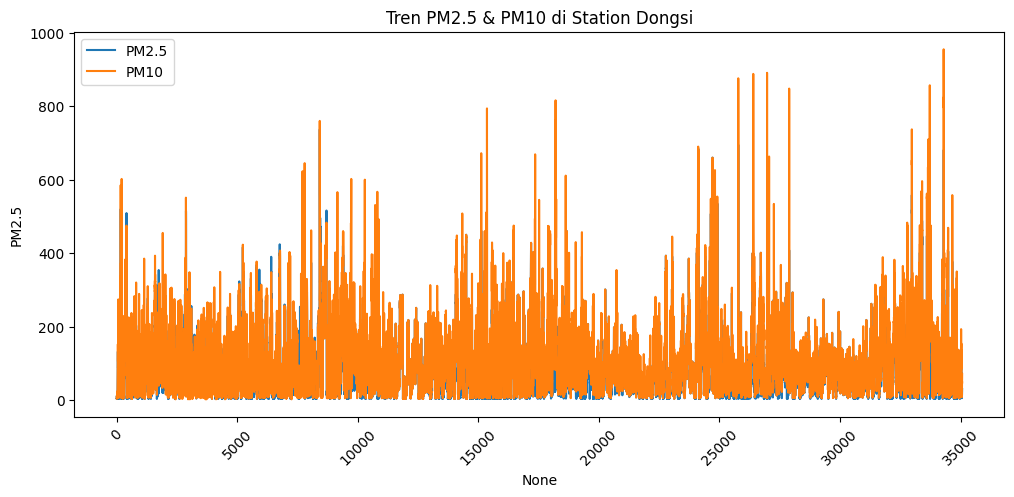

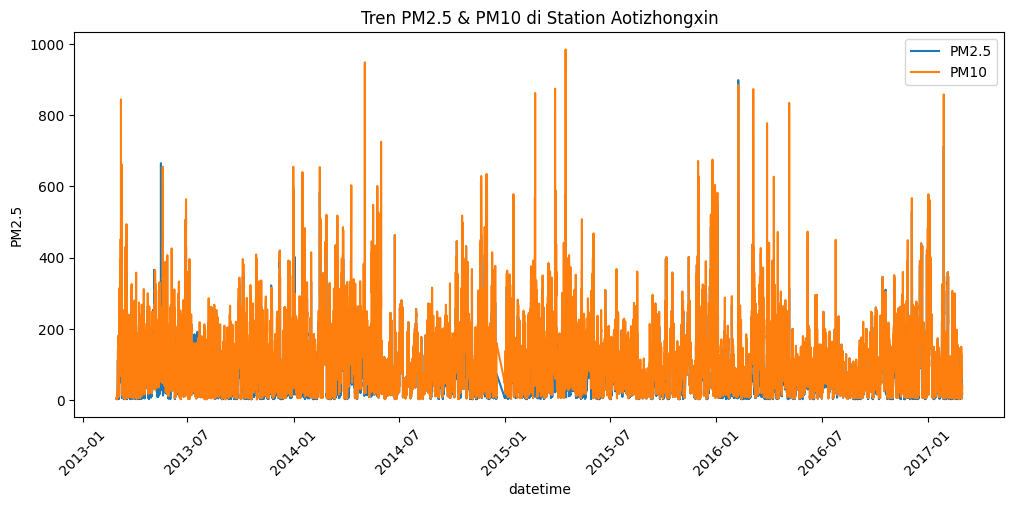

In [ ]:
#Plot Dongsi
plt.figure(figsize=(12, 5))
sns.lineplot(data=df1, x=df1.index, y="PM2.5", label="PM2.5")
sns.lineplot(data=df1, x=df1.index, y="PM10", label="PM10")
plt.title("Tren PM2.5 & PM10 di Station Dongsi")
plt.xticks(rotation=45)
plt.legend()
plt.show()

#plot Aotizhongxin
plt.figure(figsize=(12, 5))
sns.lineplot(data=df2, x=df2.index, y="PM2.5", label="PM2.5")
sns.lineplot(data=df2, x=df2.index, y="PM10", label="PM10")
plt.title("Tren PM2.5 & PM10 di Station Aotizhongxin")
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Insight:**

Tren PM2.5 dan PM10 di Dongsi
- Grafik menunjukkan puncak polusi yang relatif cukup tinggi .
- PM10 cenderung lebih tinggi secara keseluruhan, tetapi PM2.5 juga memperlihatkan fluktuasi signifikan.
- Lonjakan Ekstream umumnya terjadi pada musim dingin, yang kemungkinan terkait dengan pemanasan ruangan, dan peningkatan emisi dari transportaso serta aktivitas industri

Tren PM2.5 & PM10 di Aotizhongxin
- Grafik menunjukkan lonjakan polusi, frekuensi dan magnitudo puncak
- PM10 nya juga cenderung lebih tinggi di ikuti dengan PM2.5 juga terlihat fluktuasi signifikan

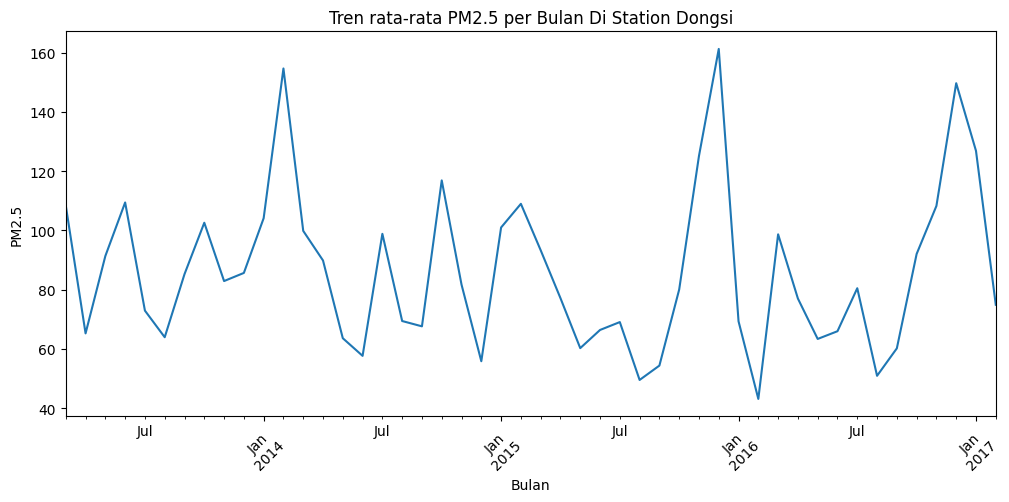

In [ ]:
df1["datetime"] = pd.to_datetime(df1[["year","month","day","hour"]])
monthly_pm25 = df1.groupby(df1["datetime"].dt.to_period("M"))["PM2.5"].mean()

plt.figure(figsize=(12, 5))
monthly_pm25.plot()
plt.title("Tren rata-rata PM2.5 per Bulan Di Station Dongsi")
plt.xlabel("Bulan")
plt.ylabel("PM2.5")
plt.xticks(rotation=45)
plt.show()

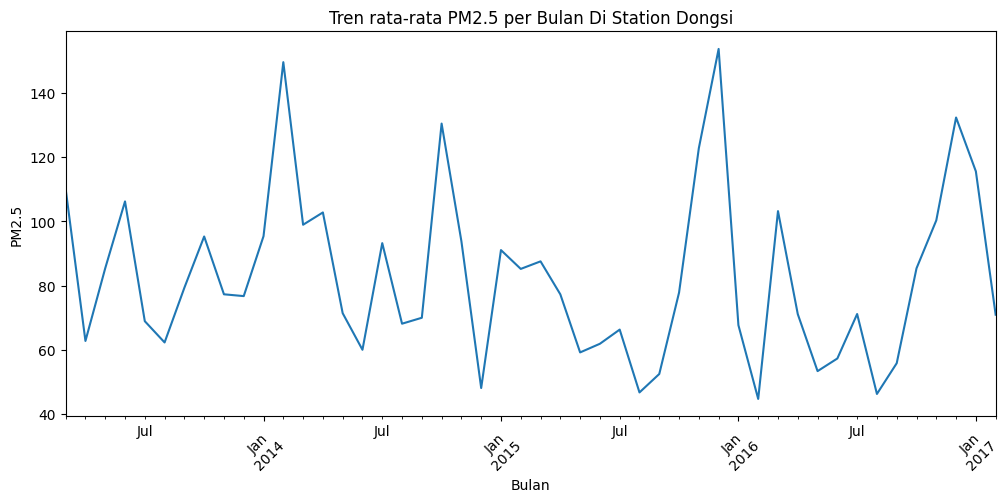

In [ ]:
df2["datetime"] = pd.to_datetime(df2[["year","month","day","hour"]])
monthly_pm25a = df2.groupby(df2["datetime"].dt.to_period("M"))["PM2.5"].mean()

plt.figure(figsize=(12, 5))
monthly_pm25a.plot()
plt.title("Tren rata-rata PM2.5 per Bulan Di Station Dongsi")
plt.xlabel("Bulan")
plt.ylabel("PM2.5")
plt.xticks(rotation=45)
plt.show()

**Insight**
- secara umum, Station Dongsi dan Aotizhongxin memiliki rata-rata PM2.5 bulanan rendah dibanding Aotizhongxin, walaupun intesitas nya sedikit lebih sama

## Visualization & Explanatory Analysis

###Bagaimana perbedaan tingkat polusi udara antara Station Dongsi dan Aotizhongxin?

<ipython-input-35-451d2e49c19c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='station', y='PM2.5', data=df_combined, palette='Set2')


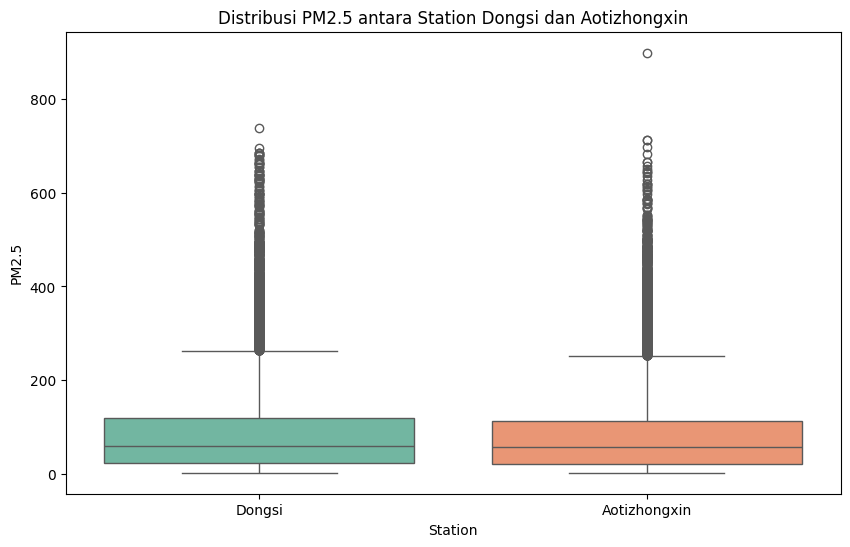

<ipython-input-35-451d2e49c19c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='station', y='PM10', data=df_combined, palette='Set2')


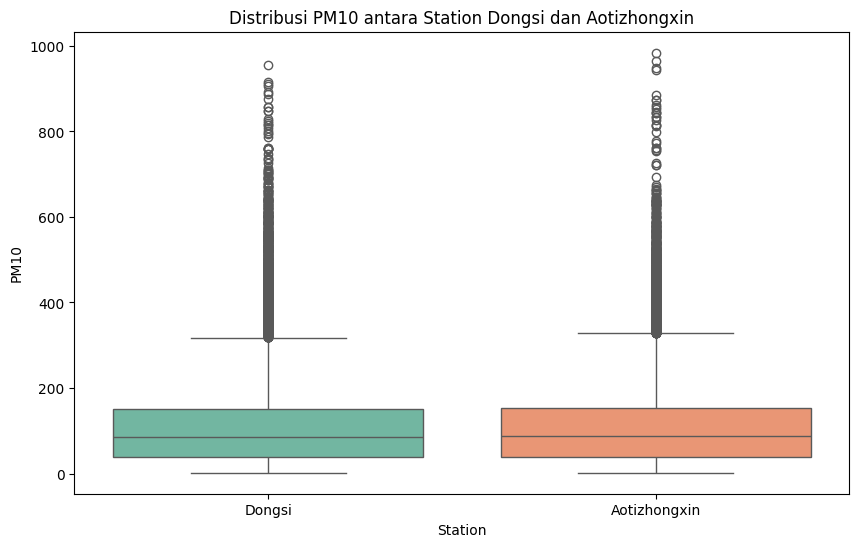

In [ ]:
#Visualisasi Boxplot untuk PM2.5
plt.figure(figsize=(10, 6))
sns.boxplot(x='station', y='PM2.5', data=df_combined, palette='Set2')
plt.title('Distribusi PM2.5 antara Station Dongsi dan Aotizhongxin')
plt.xlabel('Station')
plt.ylabel('PM2.5')
plt.show()

#Visualisasi Boxplot untuk PM10
plt.figure(figsize=(10, 6))
sns.boxplot(x='station', y='PM10', data=df_combined, palette='Set2')
plt.title('Distribusi PM10 antara Station Dongsi dan Aotizhongxin')
plt.xlabel('Station')
plt.ylabel('PM10')
plt.show()

**Insigth**
- Dongsi dan Aotizhongxin median PM2.5 dan PM10 yang relatif sama. Hal ini menunjukkan kedua statiun  memiliki tingkat polusi yang hampir sama
- Banyaknya outlier dengan nilai eksrem di kedua statiun menandakan adanya momen polusi yang tinggi

### Bagaimana hubungan antara faktor cuaca dengan tingkat polusi udara di masing-masing wilayah?

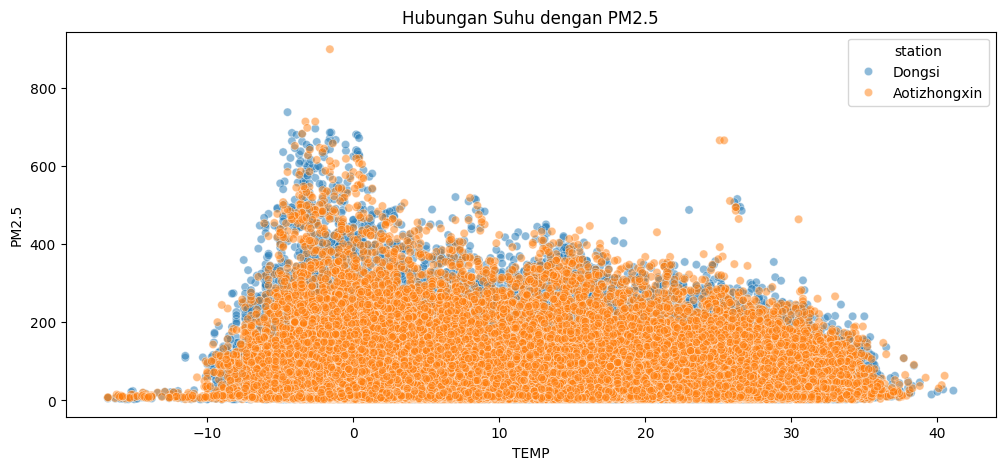

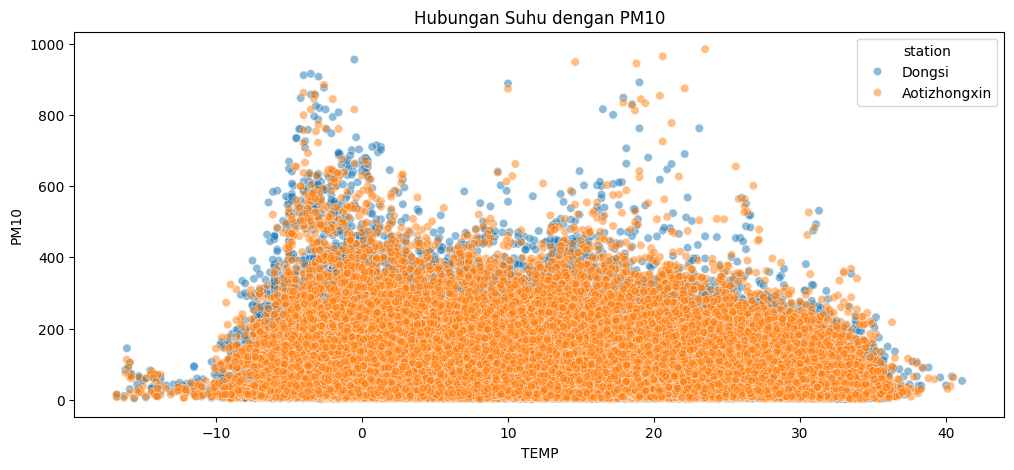

In [ ]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df_combined, x="TEMP", y="PM2.5", hue="station", alpha=0.5)
plt.title("Hubungan Suhu dengan PM2.5")
plt.show()

plt.figure(figsize=(12,5))
sns.scatterplot(data=df_combined, x="TEMP", y="PM10", hue="station", alpha=0.5)
plt.title("Hubungan Suhu dengan PM10")
plt.show()

**Insigth**

Berdasarkan kedua scatterplot di atas, terlihat bahwa kecepatan angin (WSPM) memiliki pengaruh yg signifikan terhadap polusi udara (PM2.5) di Aotizhonxing dan Dongsi, di mana peningkatan kecepatan angin cenderung menurunkan konsentrasi PM2.5 karena polutan lebih mudah terdifusi atau terdispersi. Sementara itu, titik-titik data menunjukkan bahwa pada suhu ekstrem, polusi tidak mencapai level yg paling tinggi, sehingga masih ada indikasi bahwa suhu dapat memengaruhi polusi secara tidak langsung

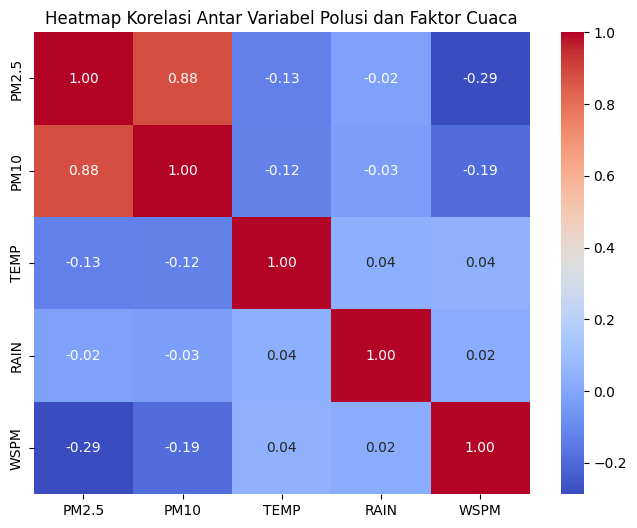

In [ ]:
#Menghitung korelasi antar variabel
correlation_matrix = df_combined[["PM2.5", "PM10", "TEMP", "RAIN", "WSPM"]].corr()

#Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel Polusi dan Faktor Cuaca")
plt.show()

**Insight:**
- Berdasarkan heatmap korelasi, terlihat bahwa PM2.5 memiliki hubungan sangat kuat dengan PM10 (r = 0.88), menunjukkan bahwa keduanya cenderung meningkat atau menurun secara bersamaan. Sementara itu, PM2.5 memiliki korelasi negatif lemah dengan suhu (r = -0.13) dan kecepatan angin (r = -0.29), yang mengindikasikan bahwa peningkatan suhu dan angin sedikit menurunkan kadar polusi, meskipun pengaruhnya tidak signifikan. Curah hujan hampir tidak berpengaruh terhadap PM2.5 (r = -0.02), menandakan peran minim hujan dalam mengurangi polusi pada data ini.

## Analisis Lanjutan

In [ ]:
# Definisikan koordinat untuk masing-masing station
locations = {
    "Dongsi": [39.551, 116.232],
    "Aotizhongxin": [39.982, 116.417]
}

# Tambahkan kolom latitude dan Longitude ke Dataframe
df_combined["latitude"] = df_combined["location"].map(lambda x: location[x][0])
df_combined["longitude"] = df_combined["location"].map(lambda x: location[x][1])

In [ ]:
# Buat peta dasat dengan Lokasi (Beijing)
m = folium.Map(location=[39.9042, 116.407], zoom_start=10)
m

In [ ]:
m = folium.Map(location=[39.9042, 116.407], zoom_start=10)
m

#menghitung rata-rata PM2.5 per station
avg_pm25 = df_combined.groupby("station")["PM2.5"].mean()

#Lalu tambahkan marker untuk kedua station
for station, coords in locations.items():
  folium.CircleMarker(
      location = coords,
      radius = avg_pm25[station] / 10,
      popup=f"{station}: {avg_pm25[station]:.2f} μg/m³",
      color="blue",
      fill=True,
      fill_color="blue",
      fill_opacity = 0.6
  ).add_to(m)

#panggil variabel m
m

In [ ]:
df_combined.to_csv("data_combined_.csv", index=False)

## Conclusion

- Conclution pertanyaan 1 :    
Terdapat perbedaan cukup signifikan pada distribusi PM2.5 dan PM10 antara station Dongsi dan Aotizhongxin, keduanya lebih sering mengalami outlier ekstrem dan lebih sering mengalamai polusi yang tinggi, yang kemungkinan dipicu oleh aktivitas industri, transportasi, dan kepadatan penduduk.

- Conclution pertanyaan 2 :     
Faktor cuaca yang paling berpengaruh terhadap polusi adalah kecepatan angin, semakin tinggi angin, semakin rendah konsentrasi PM2.5. Sedangkan suhu dan hujan tidak menunjukkan korelasi kuat terhadap polusi, sehingga perannya lebih kompleks atau tidak konsisten